In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/purdue/classification/data_with_direction

/content/drive/MyDrive/purdue/classification/data_with_direction


In [4]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.9.1


In [143]:
data_for_5 = [] 
data_for_7 = []
data_for_4 = []

data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      beacon_5 = pd.DataFrame(pd.read_csv(f'aos_clf_data_5_concated{data[0]}0{index}.csv'))
      beacon_7 = pd.DataFrame(pd.read_csv(f'aos_clf_data_7_concated{data[0]}0{index}.csv'))
      beacon_4 = pd.DataFrame(pd.read_csv(f'aos_clf_data_4_concated{data[0]}0{index}.csv'))
    else:
      beacon_5 = pd.DataFrame(pd.read_csv(f'aos_clf_data_5_concated{data[0]}{index}.csv'))
      beacon_7 = pd.DataFrame(pd.read_csv(f'aos_clf_data_7_concated{data[0]}{index}.csv'))
      beacon_4 = pd.DataFrame(pd.read_csv(f'aos_clf_data_4_concated{data[0]}{index}.csv'))
    data_for_5.append(beacon_5)
    data_for_7.append(beacon_7)
    data_for_4.append(beacon_4)


In [146]:
for i in range(0,23):
  data_for_4[i].columns = ['Unnamed: 0', 'location', '001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021',
       '022']

In [147]:
data_for_4

[     Unnamed: 0 location    001         002    003    004    005    006  \
 0             0      S01 -200.0 -200.000000 -200.0 -200.0 -200.0 -200.0   
 1             1      S01 -200.0  -77.499626 -200.0 -200.0 -200.0 -200.0   
 2             2      S01 -200.0  -76.332115 -200.0 -200.0 -200.0 -200.0   
 3             3      S01 -200.0 -200.000000 -200.0 -200.0 -200.0 -200.0   
 4             4      S01 -200.0 -200.000000 -200.0 -200.0 -200.0 -200.0   
 ..          ...      ...    ...         ...    ...    ...    ...    ...   
 842         842      S01 -200.0  -69.518493 -200.0 -200.0 -200.0 -200.0   
 843         843      S01 -200.0  -70.691660 -200.0 -200.0 -200.0 -200.0   
 844         844      S01 -200.0  -70.388890 -200.0 -200.0 -200.0 -200.0   
 845         845      S01 -200.0  -70.137050 -200.0 -200.0 -200.0 -200.0   
 846         846      S01 -200.0  -69.518493 -200.0 -200.0 -200.0 -200.0   
 
        007    008  ...        013        014    015  016  017  018    019  \
 0   -20

In [148]:
result_5 = pd.concat(data_for_5)
result_7 = pd.concat(data_for_7)
result_4 = pd.concat(data_for_4)

In [149]:
result_5.drop('Unnamed: 0', axis=1, inplace=True)
result_4.drop('Unnamed: 0', axis=1, inplace=True)
result_7.drop('Unnamed: 0', axis=1, inplace=True)

In [151]:
result_4.loc[result_4['location'] == 'A011', 'location'] = 'A11'
result_4.loc[result_4['location'] == 'A010', 'location'] = 'A10'
result_5.loc[result_5['location'] == 'A011', 'location'] = 'A11'
result_5.loc[result_5['location'] == 'A010', 'location'] = 'A10'
result_7.loc[result_7['location'] == 'A011', 'location'] = 'A11'
result_7.loc[result_7['location'] == 'A010', 'location'] = 'A10'

In [152]:
np.set_printoptions(precision=2)
le = LabelEncoder()

# result['location'] = ohe.fit_transform(result['location'])

X_5 = np.array(result_5.iloc[:, 1:])
y_5 = le.fit_transform(np.array(result_5['location']).reshape(-1, 1))
y_5 = to_categorical(y_5)

X_7 = np.array(result_7.iloc[:, 1:])
y_7 = le.fit_transform(np.array(result_7['location']).reshape(-1, 1))
y_7 = to_categorical(y_7)

X_4 = np.array(result_4.iloc[:, 1:])
y_4 = le.fit_transform(np.array(result_4['location']).reshape(-1, 1))
y_4 = to_categorical(y_4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd_5, test_ds_pd_5 = split_dataset(result_5)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_5), len(test_ds_pd_5)))


train_ds_pd_7, test_ds_pd_7 = split_dataset(result_7)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_7), len(test_ds_pd_7)))


train_ds_pd_4, test_ds_pd_4 = split_dataset(result_4)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_4), len(test_ds_pd_4)))

18388 examples in training, 7795 examples for testing.
18330 examples in training, 7853 examples for testing.
20539 examples in training, 8659 examples for testing.


In [39]:
# Install TensorFlow Dececision Forests
!pip install tensorflow_decision_forests  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 4.1 MB/s 
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 5.8 MB 33.3 MB/s 
     |████████████████████████████████| 438 kB 49.9 MB/s 
     |████████████████████████████████| 1.6 MB 28.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [16]:
import tensorflow_decision_forests as tfdf

In [154]:
train_ds_5 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_5, label='location')
test_ds_5 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_5, label='location')

train_ds_7 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_7, label='location')
test_ds_7 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_7, label='location')

train_ds_4 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_4, label='location')
test_ds_4 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_4, label='location')

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [155]:
test_ds_pd_4

,location,001,002,003,004,005,006,007,008,009,...,013,014,015,016,017,018,019,020,021,022
0,S01,-200.0,-200.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-78.00000,-68.00000,-200.0,-200.000000,-200.00000,-200.000000,-200.000000,-53.000000,-200.0,-200.0
1,S01,-200.0,-77.499626,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-69.00025,-200.0,-200.000000,-200.00000,-200.000000,-200.000000,-56.123499,-200.0,-200.0
2,S01,-200.0,-76.332115,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-68.66656,-200.0,-200.000000,-200.00000,-200.000000,-200.000000,-53.000000,-200.0,-200.0
3,S01,-200.0,-200.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-75.99825,-69.89851,-200.0,-200.000000,-200.00000,-200.000000,-200.000000,-53.000000,-200.0,-200.0
4,S01,-200.0,-200.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-76.39980,-69.25094,-200.0,-200.000000,-200.00000,-200.000000,-200.000000,-53.000000,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,U01,-200.0,-200.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.512810,-68.33074,-66.618600,-77.950645,-200.000000,-200.0,-200.0
842,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.584290,-65.49739,-66.330110,-200.000000,-200.000000,-200.0,-200.0
843,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-76.428510,-68.33074,-66.278590,-200.000000,-200.000000,-200.0,-200.0
845,U01,-200.0,-200.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.844240,-65.53062,-60.499859,-77.881935,-200.000000,-200.0,-200.0


In [18]:
beacon7_randomForest_model_1 = tfdf.keras.RandomForestModel()
beacon7_randomForest_model_1.compile(metrics=['accuracy'])
with sys_pipes():
  beacon7_randomForest_model_1.fit(x=train_ds_7)

Use /tmp/tmpsrsytg4s as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.455143. Found 18303 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpsrsytg4s/model/ with prefix d1de689b9b814327
[INFO abstract_model.cc:1248] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:24.765632
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [19]:
beacon7_randomForest_model_1_evaluation = beacon7_randomForest_model_1.evaluate(test_ds_7, return_dict = True)
print()

for name, value in beacon7_randomForest_model_1_evaluation.items():
  print(f"{name}: {value:.4f}")

8/8 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 0.9977

loss: 0.0000
accuracy: 0.9977


In [20]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)

# Hyper-parameters to optimize.
tuner.choice("max_depth", [4, 5, 6, 7])

beacon7_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon7_randomForest_model_2.fit(train_ds_7)

Use /tmp/tmpwbkjuofj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.568015. Found 18303 examples.
Training model...
Model trained in 0:00:58.621485
Compiling model...
Model compiled.


In [21]:
randomForest_model_2_evaluation = beacon7_randomForest_model_2.evaluate(test_ds_7, return_dict = True)
print()

for name, value in randomForest_model_2_evaluation.items():
  print(f"{name}: {value:.4f}")

8/8 [==============================] - 1s 91ms/step - loss: 0.0000e+00

loss: 0.0000


In [22]:
beacon4_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon4_randomForest_model_2.fit(train_ds_4)

Use /tmp/tmpq9pxrv5b as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.459957. Found 20561 examples.
Training model...
Model trained in 0:00:33.838209
Compiling model...
Model compiled.


In [23]:
beacon5_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon5_randomForest_model_2.fit(train_ds_5)

Use /tmp/tmpway8vgf9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.883176. Found 18160 examples.
Training model...
Model trained in 0:00:47.432072
Compiling model...
Model compiled.


In [24]:
beacon4_randomForest_model_2_evaluation = beacon4_randomForest_model_2.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_2_evaluation.items():
  print(f"{name}: {value:.4f}")

9/9 [==============================] - 0s 35ms/step - loss: 0.0000e+00
loss: 0.0000


In [25]:
randomForest_model_maxdepth4 = tfdf.keras.RandomForestModel(max_depth=4)
randomForest_model_maxdepth5 = tfdf.keras.RandomForestModel(max_depth=5)
randomForest_model_maxdepth6 = tfdf.keras.RandomForestModel(max_depth=6)
randomForest_model_maxdepth7 = tfdf.keras.RandomForestModel(max_depth=7)

Use /tmp/tmp9mthaehp as temporary training directory
Use /tmp/tmplad5i8ni as temporary training directory
Use /tmp/tmpt_v26bfl as temporary training directory
Use /tmp/tmpxyg557h6 as temporary training directory


# RandomForest
## max_depth: 4,5,6,7 를 사용해서 각각의 모델을 평가한다.

## RandomForest
- max_depth : 4
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [26]:
randomForest_model_maxdepth4.fit(train_ds_4)
beacon4_randomForest_model_maxdepth4_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth4_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...


Training dataset read in 0:00:00.605112. Found 20561 examples.
Training model...
Model trained in 0:00:05.912275
Compiling model...


Model compiled.


9/9 [==============================] - 0s 27ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 5
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [27]:
randomForest_model_maxdepth5.fit(train_ds_4)
beacon4_randomForest_model_maxdepth5_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth5_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...


Training dataset read in 0:00:00.574256. Found 20561 examples.
Training model...
Model trained in 0:00:07.554602
Compiling model...


Model compiled.


9/9 [==============================] - 0s 26ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 6
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [28]:
randomForest_model_maxdepth6.fit(train_ds_4)
beacon4_randomForest_model_maxdepth6_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth6_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.590052. Found 20561 examples.
Training model...
Model trained in 0:00:09.295150
Compiling model...
Model compiled.
9/9 [==============================] - 0s 26ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 7
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [29]:
randomForest_model_maxdepth7.fit(train_ds_4)
beacon4_randomForest_model_maxdepth7_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth7_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.598165. Found 20561 examples.
Training model...
Model trained in 0:00:11.172265
Compiling model...
Model compiled.
9/9 [==============================] - 0s 29ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 4
- data: 상위비콘 5개를 제외한 나머지 비콘을 -200

In [30]:
randomForest_model_maxdepth4_2 = tfdf.keras.RandomForestModel(max_depth=4)
randomForest_model_maxdepth4_2.fit(train_ds_5)
beacon5_randomForest_model_maxdepth4_evaluation = randomForest_model_maxdepth4_2.evaluate(test_ds_5, return_dict = True)

for name, value in beacon5_randomForest_model_maxdepth4_evaluation.items():
  print(f"{name}: {value:.4f}")

Use /tmp/tmpf_56jhtj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.554243. Found 18160 examples.
Training model...
Model trained in 0:00:08.187710
Compiling model...
Model compiled.
9/9 [==============================] - 0s 26ms/step - loss: 0.0000e+00
loss: 0.0000


# GBM

In [31]:
from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

### GBM Model 1
- 비콘 4개를 사용한 것
- 과적합을 방지하기 위해서 depth를 2로만 사용한다.
- 과적합을 방지하기 위해 subsample 0.7


In [156]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 33,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_1 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_1.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_1.fit(x=train_ds_4, validation_data=test_ds_4, verbose=1)
print(GBM_model_1.evaluate(train_ds_4, return_dict=True))
print(GBM_model_1.evaluate(test_ds_4, return_dict=True))

Use /tmp/tmpebp1qk_y as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.662767. Found 20539 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(8659, shape=(), dtype=int32)
Validation dataset read in 0:00:00.570840. Found 8659 examples.
Training model...
Model trained in 0:00:13.010411
Compiling model...
Model compiled.
21/21 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.9380 - recall: 0.9161 - f1score: 0.9344 - precision: 0.9722
{'loss': 0.0, 'accuracy': 0.9380203485488892, 'recall': 0.9161460399627686, 'f1score': 0.9343931078910828, 'precision': 0.9722222685813904}
9/9 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.9379 - recall: 0.9141 - f1score: 0.9380 - precision: 0.9696
{'loss': 0.0, 'accuracy': 0.9378681182861328, 'recall': 0.9140838980674744, 'f1score': 0.9380472898483276, 'precision': 0.9695553183555603}


### GBM_model_2
- 비콘 5개를 사용

In [34]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 33,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_2 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_2.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_2.fit(x=train_ds_5, validation_data=test_ds_5)
print(GBM_model_2.evaluate(train_ds_5, return_dict=True))
print(GBM_model_2.evaluate(test_ds_5, return_dict=True))

Use /tmp/tmpwy7kbjcl as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.056513. Found 18160 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(8023, shape=(), dtype=int32)
Validation dataset read in 0:00:00.487363. Found 8023 examples.
Training model...
Model trained in 0:00:11.744124
Compiling model...
Model compiled.
19/19 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.9547 - recall: 0.9457 - f1score: 0.9498 - precision: 0.9678
{'loss': 0.0, 'accuracy': 0.9546806216239929, 'recall': 0.945716142654419, 'f1score': 0.9498377442359924, 'precision': 0.9678332805633545}
9/9 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.9443 - recall: 0.9364 - f1score: 0.9516 - precision: 0.9694
{'loss': 0.0, 'accuracy': 0.9442851543426514, 'recall': 0.9363667964935303, 'f1score': 0.9515950083732605, 'precision': 0.9694048762321472}


### GBM_Model_3
- 비콘 7개를 사용한다.

In [35]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 50,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_3 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_3.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_3.fit(x=train_ds_7, validation_data=test_ds_7)
print(GBM_model_3.evaluate(train_ds_7, return_dict=True))
print(GBM_model_3.evaluate(test_ds_7, return_dict=True))

Use /tmp/tmpwav4rxkt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.583921. Found 18303 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(7880, shape=(), dtype=int32)
Validation dataset read in 0:00:00.491983. Found 7880 examples.
Training model...
Model trained in 0:00:19.056023
Compiling model...
Model compiled.
19/19 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 0.9824 - recall: 0.9833 - f1score: 0.9688 - precision: 0.9678
{'loss': 0.0, 'accuracy': 0.98240727186203, 'recall': 0.9832568764686584, 'f1score': 0.9688359498977661, 'precision': 0.9678362607955933}
8/8 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 0.9773 - recall: 0.9795 - f1score: 0.9726 - precision: 0.9682
{'loss': 0.0, 'accuracy': 0.9772842526435852, 'recall': 0.9795423150062561, 'f1score': 0.9725970029830933, 'precision': 0.9681954383850098}


In [36]:
y_pred = GBM_model_3.predict(test_ds_7)

8/8 [==============================] - 0s 28ms/step


In [37]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [38]:
true_categories = tf.concat([y for x, y in test_ds_7], axis=0)

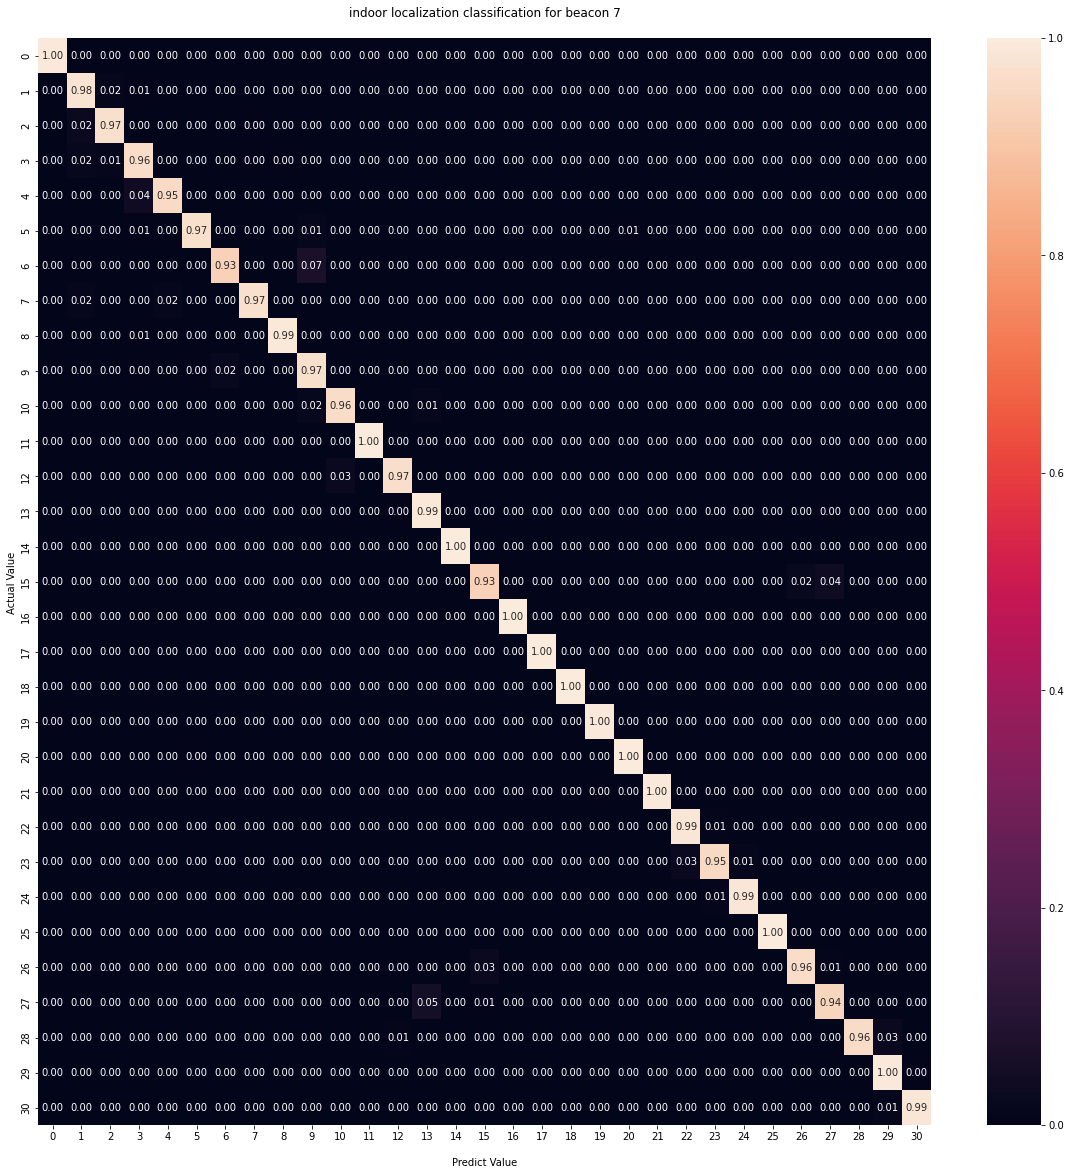

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix_GBM_7 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_7.astype('float') / confusion_matrix_GBM_7.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(20, 20)) 

ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification for beacon 7\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

9/9 [==============================] - 0s 18ms/step


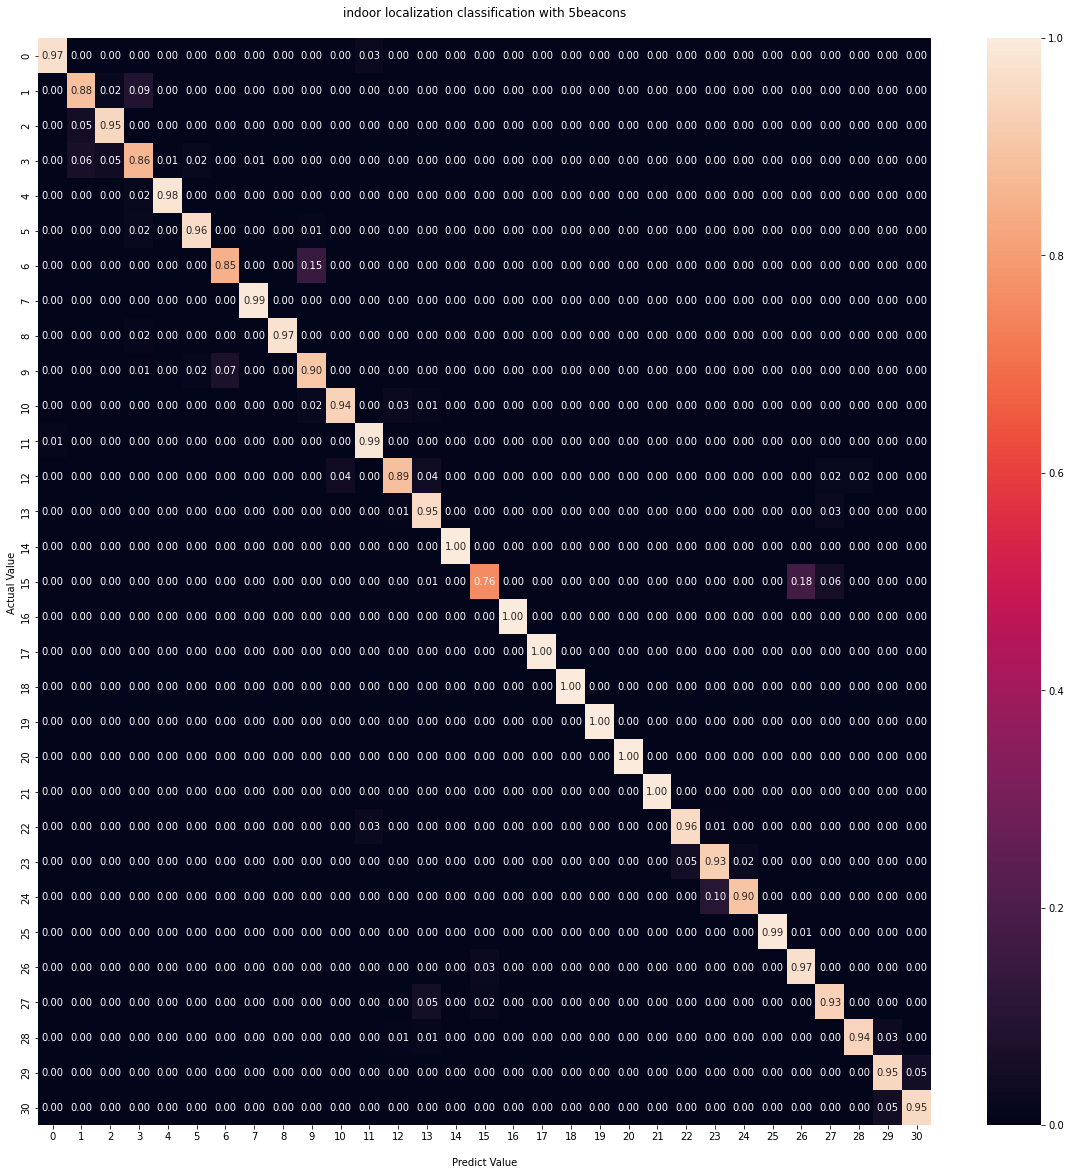

In [40]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_2.predict(test_ds_5)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds_5], axis=0)

confusion_matrix_GBM_5 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_5.astype('float') / confusion_matrix_GBM_5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 5beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

9/9 [==============================] - 0s 21ms/step


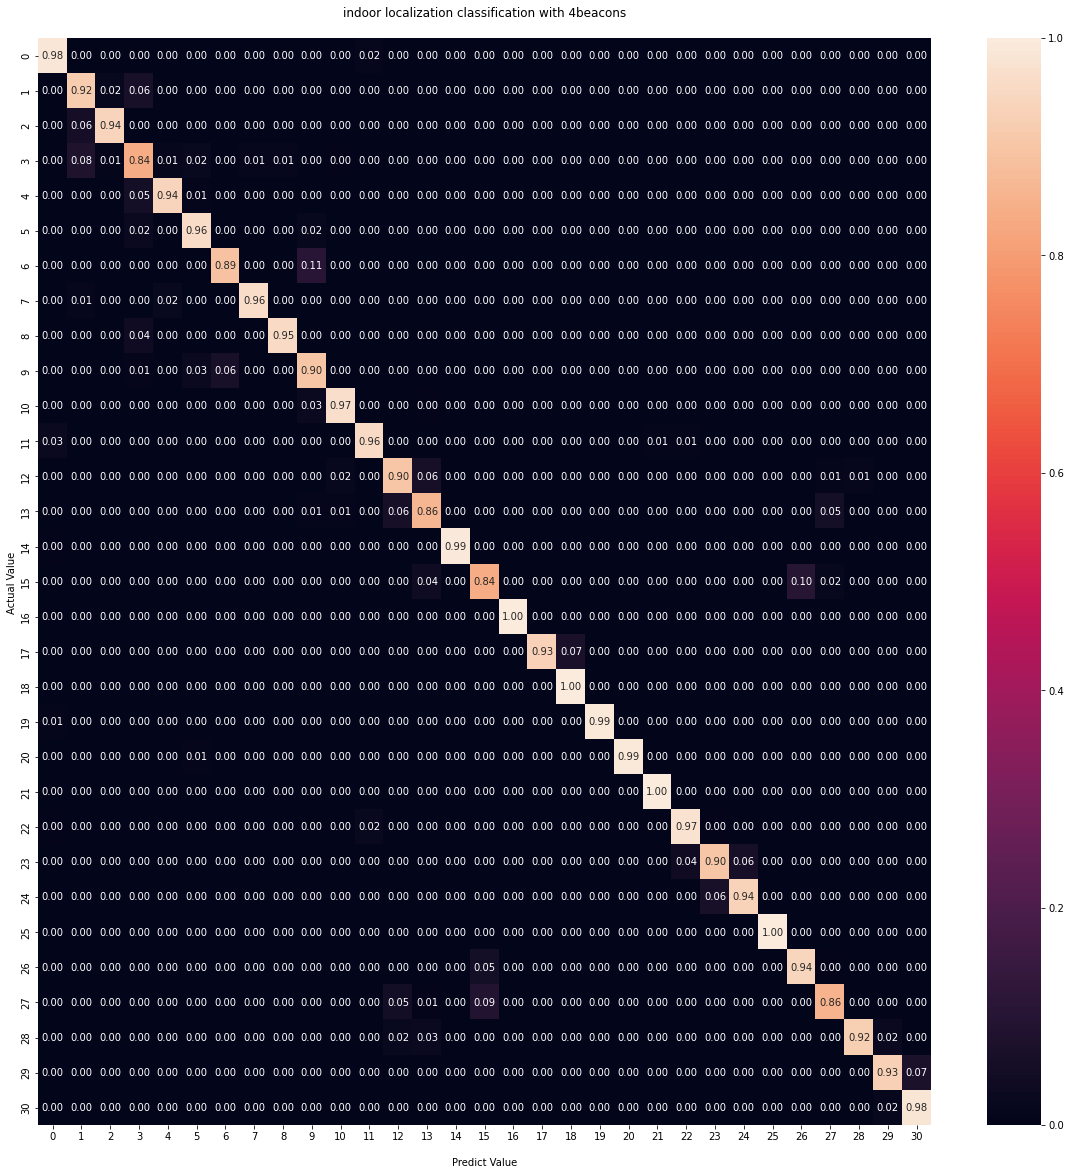

In [157]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_1.predict(test_ds_4)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds_4], axis=0)


confusion_matrix_GBM_4 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_4.astype('float') / confusion_matrix_GBM_4.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 4beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

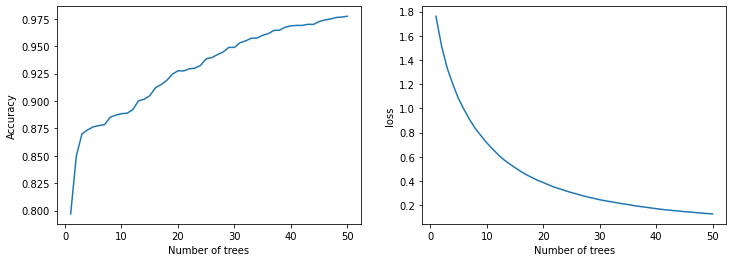

In [158]:
import matplotlib.pyplot as plt

logs = GBM_model_3.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

<Figure size 432x288 with 0 Axes>

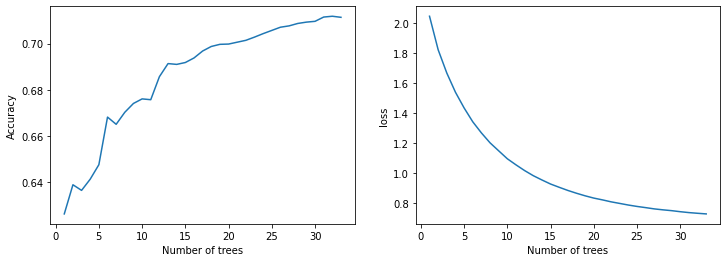

In [43]:
plt.clf()

logs = GBM_model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

<Figure size 432x288 with 0 Axes>

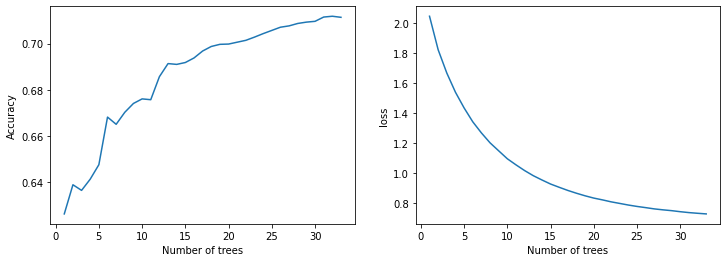

In [44]:
plt.clf()

logs = GBM_model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

<Figure size 432x288 with 0 Axes>

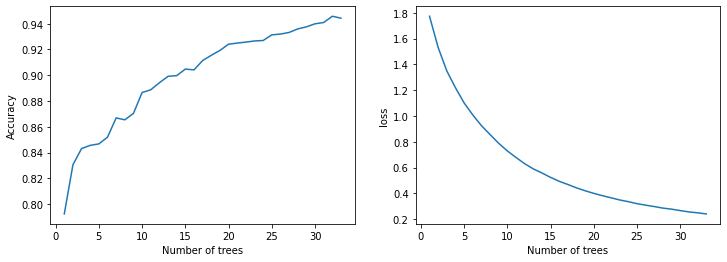

In [45]:
plt.clf()

logs = GBM_model_2.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

In [159]:
# Test Dataset
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/{data[0]}0{index}.csv'))
      no_supervised.drop('Date', axis=1, inplace=True)
      no_supervised.drop('CompassValue', axis=1, inplace=True)
      no_supervised.drop('CompassString', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/{data[0]}{index}.csv'))
      no_supervised.drop('Date', axis=1, inplace=True)
      no_supervised.drop('CompassValue', axis=1, inplace=True)
      no_supervised.drop('CompassString', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)

def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [160]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]

In [161]:
testdatas

[    location        001         002    003         004    005  006    007  \
 0        S01 -200.00000  -79.000000 -200.0 -200.000000 -200.0 -200 -200.0   
 1        S01 -200.00000  -77.499626 -200.0 -200.000000 -200.0 -200 -200.0   
 2        S01  -87.99950  -76.332115 -200.0  -89.499626 -200.0 -200 -200.0   
 3        S01  -86.99883  -76.332115 -200.0  -89.499626 -200.0 -200 -200.0   
 4        S01 -200.00000  -78.003200 -200.0  -88.665726 -200.0 -200 -200.0   
 ..       ...        ...         ...    ...         ...    ...  ...    ...   
 414      S01  -89.21532  -75.927300 -200.0  -84.355820 -200.0 -200 -200.0   
 415      S01  -89.18844  -75.818344 -200.0  -84.355820 -200.0 -200 -200.0   
 416      S01  -89.11793  -76.021370 -200.0 -200.000000 -200.0 -200 -200.0   
 417      S01  -89.11793  -76.021370 -200.0  -84.458510 -200.0 -200 -200.0   
 418      S01  -89.09321 -200.000000 -200.0  -84.426260 -200.0 -200 -200.0   
 
        008        009  ...        013        014    015  016 

In [162]:
# 상위 4개를 통해서 classification 하기
for data in testdatas:
  for row_index in range(len(data)):
    column_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    a = sorted(data.loc[row_index].tolist()[1:])
    b = list(a)[-4:]
    isMax = [0]
    for i in range(len(data.columns)):
      for num in b:
        if data.loc[row_index][i] == num:
          isMax.append(i)

    remove_set = set(isMax)
    column_idx = [i for i in column_idx if i not in remove_set]
    data.iloc[[row_index], column_idx] = [-200 for i in range(len(column_idx))]

In [163]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]
for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)
for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [168]:
for i in range(0,23):
  testdatas[i].columns = ['location', '001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021',
       '022']

In [169]:
result_test = pd.concat(testdatas)

In [170]:
result_test.reset_index(inplace=True)

In [171]:
result_test.drop('index', axis=1, inplace=True)

In [172]:
testdata_ds = tfdf.keras.pd_dataframe_to_tf_dataset(result_test, label='location')

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


7/7 [==============================] - 0s 35ms/step


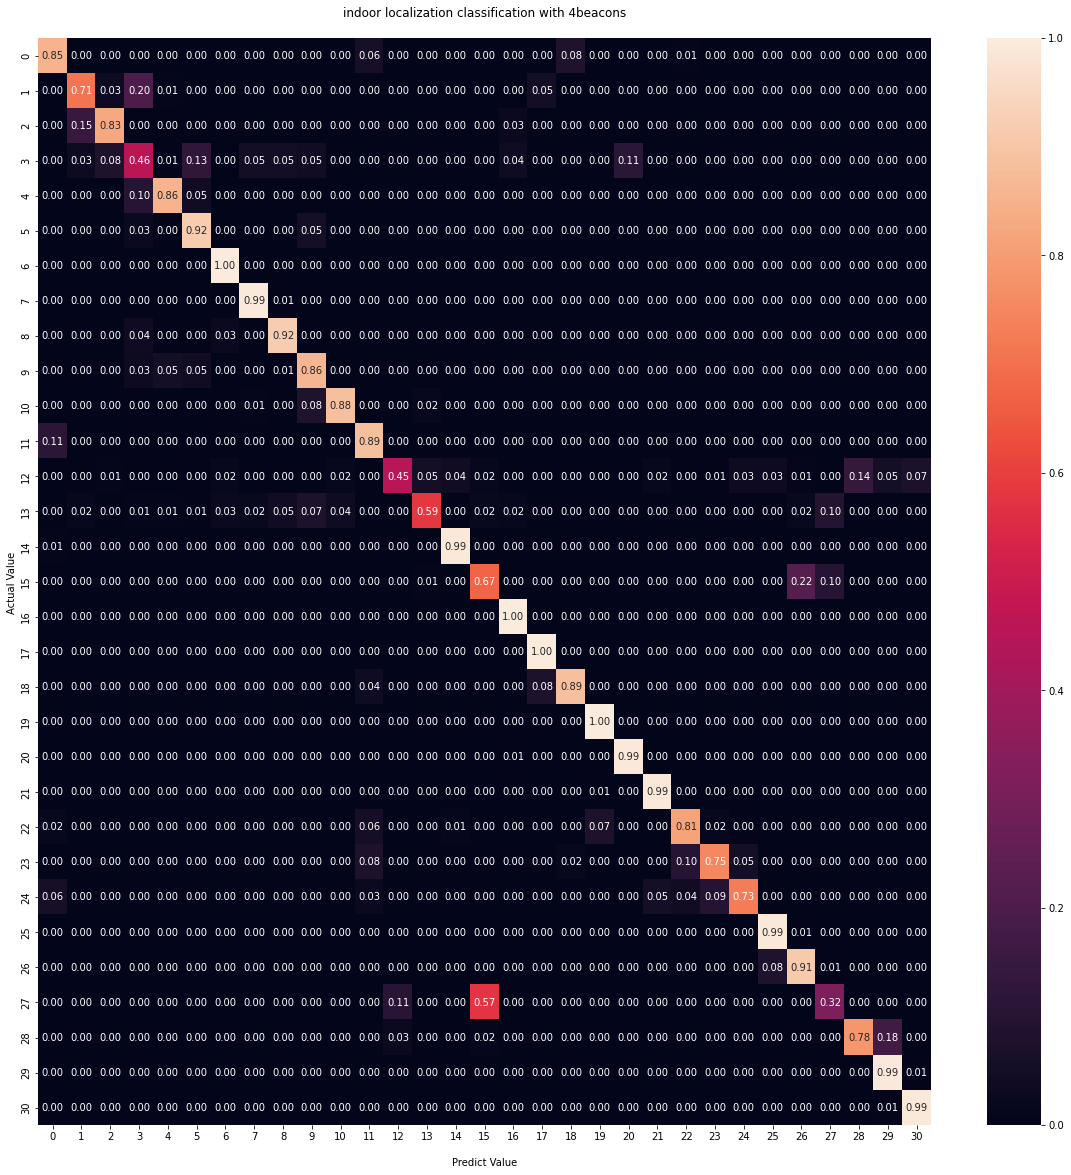

In [175]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_1.predict(testdata_ds)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in testdata_ds], axis=0)


confusion_matrix_GBM_5 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_5.astype('float') / confusion_matrix_GBM_5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 4beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [176]:
print(GBM_model_1.evaluate(testdata_ds, return_dict=True))

7/7 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 0.8204 - recall: 0.7936 - f1score: 0.8731 - precision: 0.9748
{'loss': 0.0, 'accuracy': 0.820425271987915, 'recall': 0.7936270833015442, 'f1score': 0.8730517625808716, 'precision': 0.9748182892799377}
